# Zylentrix Student Engagement Analysis

## Background
Zylentrix runs an online training platform where students enrol in different learning tracks (e.g., Digital Marketing, Python, UI/UX, etc.). The platform
records student behaviour, such as logins, course completions, time spent on lessons, and feedback.

## Data
The system captures data one student enrollment in different courses, their activity in different courses and feedback they give regarding different courses. Based on these system produce `.csv` files as the following:

1. `students.csv` – Contains student info (ID, Name, Age, Gender, Location, Enrolment Date)
2. `course_activity.csv` – Tracks user activity (Student ID, Course ID, Date, Time Spent [mins], Completion %)
3. `feedback.csv` – Records feedback (Student ID, Course ID, Rating [1-5], Feedback Text)

## Prepare Data
To begin with the analysis, first load the necessary libraries and then load the `.csv` files in data frames. For this analysis we will be using `pandas` library for data preparation, cleaning and transformation where needed.

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load csv files in data frames
students_df = pd.read_csv('data/students.csv')
course_activity_df = pd.read_csv('data/course_activity.csv')
feedback_df = pd.read_csv('data/feedback.csv')

Now as the data has been loaded, lets have a peek.

In [2]:

# quick look at the data frames
print(students_df.head())
print(course_activity_df.head())
print(feedback_df.head())

  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1       S063     PY202       2  Loved the examples
2

So, from the above it is seen that the `student_df` contains details of the student's enrolled in different courses in the platform, `course_activity_df` is these students involvement in different courses, and `feedback_df` contains student feedback towards different courses. 

## Cleaning

But, this is merely an overview of the entire data set. For analysis, more details of these data sets like how large is the data set and each variables and their types are needed. Also, to get proper isight of the data and drawout meaningful observations, the data needs to be consistent and error free as much as possible and for these purposes cleaning of the data is necessay.

Let's start with the student data. First have a view of the data frame's structure.

In [3]:
# check info of the data frame
print(students_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None


So this data frame contains six (6) variables with hundred (100) observations. Also a matter of relief that all the observations for each of the variables are `null` free. Although, the `Enrollment_Date` field is stored as object. It is better if this is converted to `datetime` type. Also, `Student_ID` should not be duplicate. And, whitespaces needs to be removed from `Name` and `Location` data.

In [4]:
# convert Enrollment_Date to datetime
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], errors='coerce', format='%d/%m/%Y', dayfirst=True)
# remove whitespaces from Name and Location
students_df['Name'] = students_df['Name'].str.strip()
students_df['Location'] = students_df['Location'].str.strip()
# remove duplicates if any
students_df.drop_duplicates(subset='Student_ID', keep='first', inplace=True)
print(students_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB
None


And the Student data is ready to be coocked. Similarly, for the course activity data, let's have a look at the data structure.

In [5]:
# check info of the data frame
print(course_activity_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.9+ KB
None


Here also `Date` field to be converted in `datatime` type, duplicates to be removed and additionally, invalid or unrealistic data like `Time_Spent_Minutes` less than zero (0) or `Competion_Percentage` less than zero (0)/ greater than hundred (100) to be removed.

In [6]:
# convert Date to datetime
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], errors='coerce', format='%d/%m/%Y', dayfirst=True)
# remove duplicates if any
course_activity_df.drop_duplicates(keep='first', inplace=True)
# remove invalid data
course_activity_df = course_activity_df[course_activity_df['Time_Spent_Minutes'] >= 0]
course_activity_df = course_activity_df[(course_activity_df['Completion_Percentage'] >= 0) & 
                                        (course_activity_df['Completion_Percentage'] <= 100)]
print(course_activity_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             659 non-null    object        
 1   Course_ID              659 non-null    object        
 2   Date                   659 non-null    datetime64[ns]
 3   Time_Spent_Minutes     659 non-null    int64         
 4   Completion_Percentage  659 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 25.9+ KB
None


And lastly for the feedback data. Here is the structure of the data.

In [7]:
print(feedback_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB
None


Remove whitespaces from the feedback text and invalid rating like bellow 1 or more than 5 and this will be ready. As there is no date of feedback given, we will remove the duplicates based on `Student_ID` and `Course_ID` but this time we will keep the last occurence considering that to be the latest feedback by a student regarding a course.

In [8]:
# remove whitespace from Feedback_Text
feedback_df['Feedback_Text'] = feedback_df['Feedback_Text'].str.strip()
# remove invalid ratings
feedback_df = feedback_df[feedback_df['Rating'].between(1, 5)]
# remove duplicates if any
feedback_df.drop_duplicates(subset=['Student_ID', 'Course_ID'], keep='last', inplace=True)
print(feedback_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB
None


It is a good thing to see that removing duplicates or invalid data from the data frames does not shrink the size, i.e., the observations are intact and this qualifies as good data.

Now the cleaning is done, analysis can be started.

## Analysis
#### Average Completion Rate for Courses
First find out what is the average completion rate for the courses.

In [9]:
# average comletion rate across all courses
overall_avg_completion = course_activity_df['Completion_Percentage'].mean()
print(f"Overall Average Completion Rate: {overall_avg_completion:.2f}%")

Overall Average Completion Rate: 54.78%


#### Highest & Lowest Engagement
Next let's find out which courses have highest and lowest average engagement.

In [10]:
# Calculate average engagement time by course
avg_time_by_course = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()

# Display results
print("Average Engagement Time by Course (in minutes):")
print(avg_time_by_course)

# Identify highest and lowest
highest_course = avg_time_by_course.idxmax()
highest_time = avg_time_by_course.max()
lowest_course = avg_time_by_course.idxmin()
lowest_time = avg_time_by_course.min()

print(f"\nCourse with Highest Average Engagement Time: {highest_course} ({highest_time:.2f} minutes)")
print(f"Course with Lowest Average Engagement Time: {lowest_course} ({lowest_time:.2f} minutes)")

Average Engagement Time by Course (in minutes):
Course_ID
PY202     93.902439
WD404     96.419162
UX303     99.816568
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64

Course with Highest Average Engagement Time: DM101 (102.43 minutes)
Course with Lowest Average Engagement Time: PY202 (93.90 minutes)


#### Engagement by Age Groups and Location
Okay, now lets find out how this engagement differs in different ages of students and their residence. For this, as the age of the student is in `students_df` data frame, it is needed to be joined with `course_activity_df` data frame based on `Student_ID` and `Location`. 

First, to find out activities in age groups, a age group wise bin is needed. For this analysis, a visualization based on age groups would be best to understand the pattern.

Text(0, 0.5, 'Completion Percentage (%)')

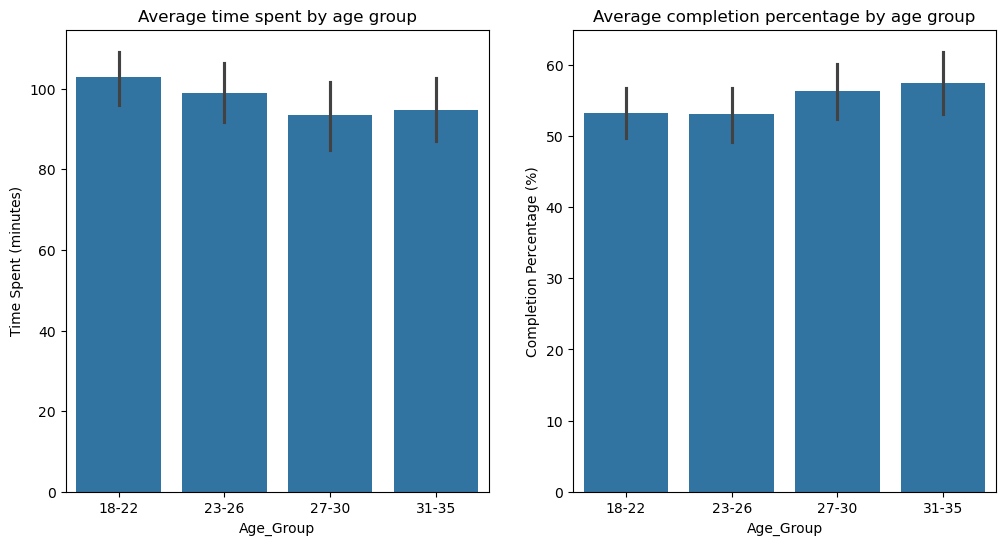

In [11]:
# merge course activity and students data frames
merged_df = course_activity_df.merge(students_df[['Student_ID', 'Age', 'Location']], on='Student_ID', how='left')

# create age bins
age_bins = [18, 22, 26, 30, 35]
labels = ['18-22', '23-26', '27-30', '31-35']

# create a new column for age bins
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=labels, include_lowest=True)

# visualize the data
plt.figure(figsize=(12, 6))

# by time spent on courses
plt.subplot(1, 2, 1)
sns.barplot(x='Age_Group', y='Time_Spent_Minutes', data=merged_df)
plt.title('Average time spent by age group')
plt.ylabel('Time Spent (minutes)')

# by completion percentage
plt.subplot(1, 2, 2)
sns.barplot(x='Age_Group', y='Completion_Percentage', data=merged_df)
plt.title('Average completion percentage by age group')
plt.ylabel('Completion Percentage (%)')

This is a good finding that though young learners are more active on the platform, aged professionals are more consistent and tends to complete the courses. Now lets do the same based on student's location.

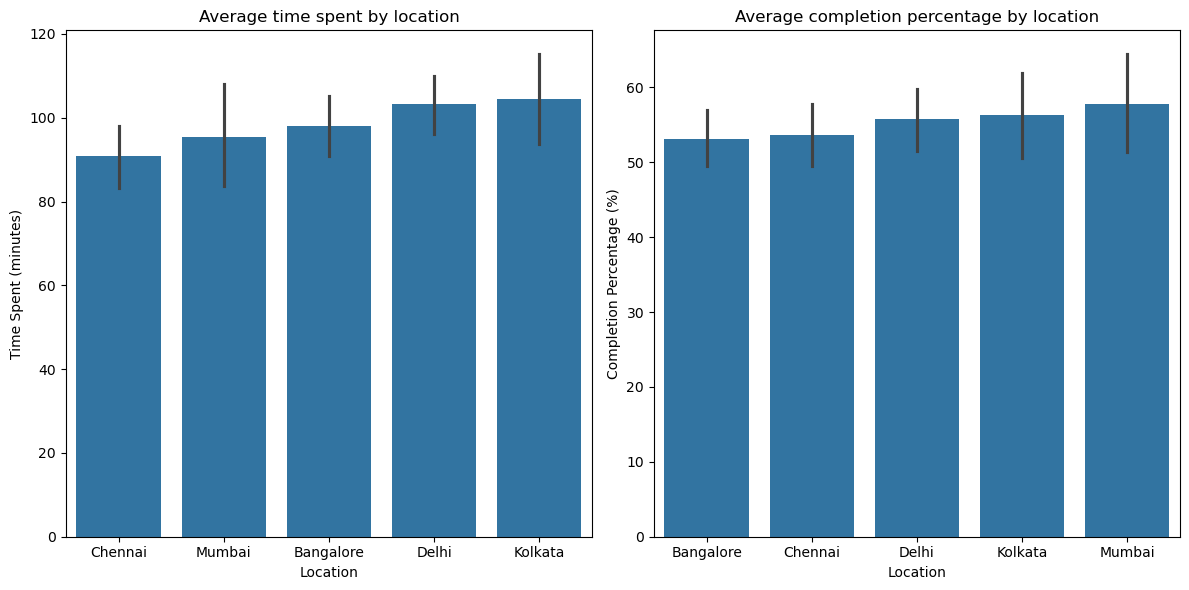

In [12]:
# visualize the data
plt.figure(figsize=(12, 6))

# by time spent on courses
plt.subplot(1, 2, 1)
sns.barplot(x='Location', y='Time_Spent_Minutes', data=merged_df, order=merged_df.groupby('Location')['Time_Spent_Minutes'].mean().sort_values().index)
plt.title('Average time spent by location')
plt.ylabel('Time Spent (minutes)')
# by completion percentage
plt.subplot(1, 2, 2)
sns.barplot(x='Location', y='Completion_Percentage', data=merged_df, order=merged_df.groupby('Location')['Completion_Percentage'].mean().sort_values().index)
plt.title('Average completion percentage by location')
plt.ylabel('Completion Percentage (%)')
plt.tight_layout()

Okay, so Kolkata people are more active on the platform but Mumbaikars are ahead in completing courses.

From both above visualizations, one thing is of good achievement for the platform is that irrespective of age group or location, students are very active with the courses with more than 90 minutes of engagent and completion percentage is also above 50%.

#### Average Feedback Rating
Now that student's interactions with the platform is seen, lets check how they feel about the courses. To find that, simply find out the average feedback rating of each course.

In [13]:
# average rating by course
avg_rating_by_course = feedback_df.groupby('Course_ID')['Rating'].mean().sort_values()

# Display results
print("\nAverage Rating by Course:")
print(avg_rating_by_course)


Average Rating by Course:
Course_ID
WD404    2.789474
DM101    2.900000
UX303    2.923077
PY202    3.277778
Name: Rating, dtype: float64


So course PY202 got better rating from the students.

#### Finding correlation between completion rate and feedback rating
This will be a good observation if we find a relation between completion rate and feedback rating. To do this, a scatterplot visualization would be great.

Text(0, 0.5, 'Feedback Rating')

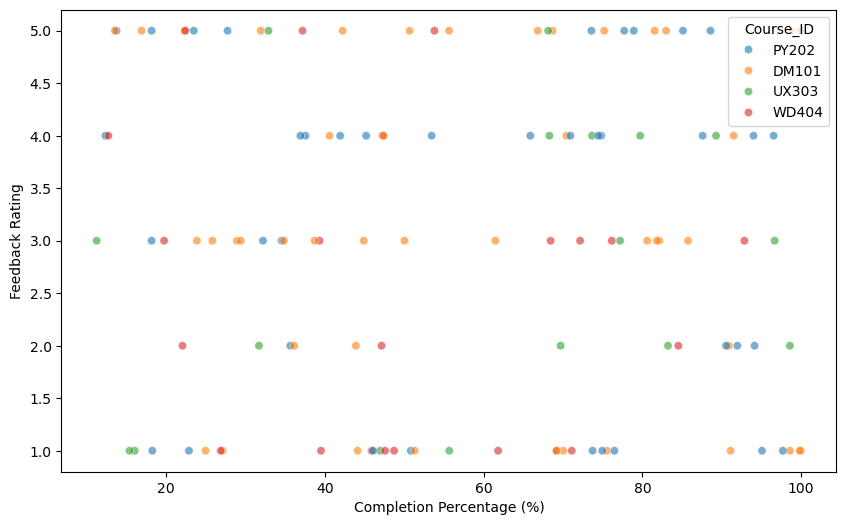

In [14]:
# inner join course activity and feedback data frames
merged_df = course_activity_df.merge(
    feedback_df[['Student_ID', 'Course_ID', 'Rating']], 
    on=['Student_ID', 'Course_ID'], 
    how='inner'
)

# scatter plot between completion rate and feedback rating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Completion_Percentage',
    y='Rating',
    hue='Course_ID',
    alpha=0.6
)
plt.xlabel('Completion Percentage (%)')
plt.ylabel('Feedback Rating')

But alas. There is no direct relationship between the course completion rate and rating. To confirm this statistically, course specific correlation between the two variable can be deduced.

In [15]:
# find Correlation by course
for course in merged_df['Course_ID'].unique():
    course_data = merged_df[merged_df['Course_ID'] == course]
    if len(course_data) > 1: # ensure there are enough data points
        corr = course_data['Completion_Percentage'].corr(course_data['Rating'], method='pearson')
        print(f"Correlation for {course}: {corr:.3f}")

Correlation for PY202: -0.116
Correlation for DM101: -0.173
Correlation for UX303: 0.311
Correlation for WD404: -0.021


All the courses have very weak to weak correlation confirming that completion percentage doesn't directly influence positive or negetive feedback.

#### Segments based on engagement and satisfaction.
To identify the top 3 student segments based on engagement and satisfaction where Engagement will be measured using `Time_Spent_Minutes` and `Completion_Percentage` from `course_activity_df`, and satisfaction will be measured using `Rating` from `feedback_df`. Then segment students by combining demographic variables (e.g., Age_Group, Gender, Location from `students_df`) and course-related variables (e.g., Course_ID), calculate average engagement and satisfaction metrics for each segment, and rank them to identify the top 3.

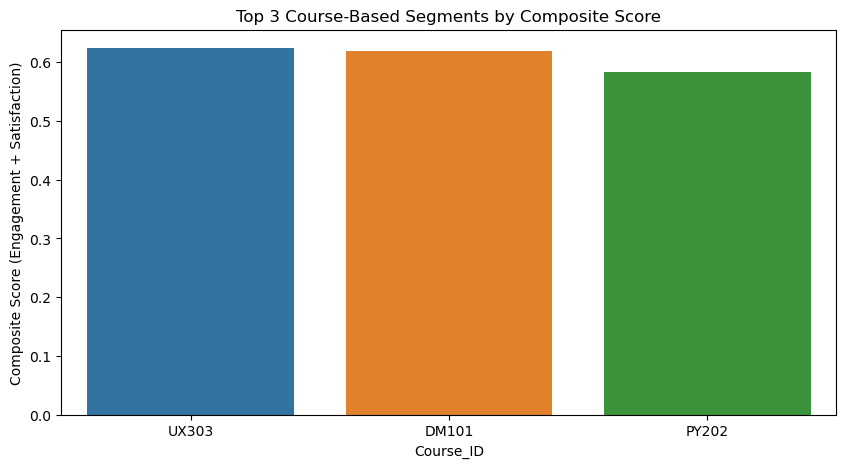

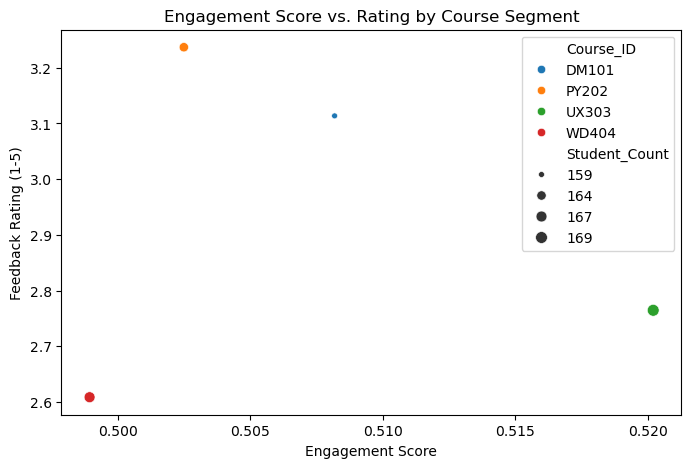

In [16]:
# merge data frames
merged_df = course_activity_df.merge(
    students_df[['Student_ID', 'Age', 'Gender', 'Location']],
    on='Student_ID',
    how='left'
)
# create a new column for age bins
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=labels, include_lowest=True)

# merge with feedback data frame to include ratings
merged_df = merged_df.merge(
    feedback_df[['Student_ID', 'Course_ID', 'Rating']],
    on=['Student_ID', 'Course_ID'],
    how='left' # only include records with feedback
)

# Normalize Time_Spent_Minutes and Completion_Percentage
merged_df['Norm_Time_Spent'] = (merged_df['Time_Spent_Minutes'] - merged_df['Time_Spent_Minutes'].min()) / (merged_df['Time_Spent_Minutes'].max() - merged_df['Time_Spent_Minutes'].min())
merged_df['Norm_Completion'] = (merged_df['Completion_Percentage'] - merged_df['Completion_Percentage'].min()) / (merged_df['Completion_Percentage'].max() - merged_df['Completion_Percentage'].min())

# Composite engagement score (average of normalized metrics)
merged_df['Engagement_Score'] = (merged_df['Norm_Time_Spent'] + merged_df['Norm_Completion']) / 2

# Segment by Course_ID only
segment_metrics = merged_df.groupby('Course_ID').agg({
    'Engagement_Score': 'mean',
    'Rating': 'mean',
    'Student_ID': 'count'
}).rename(columns={'Student_ID': 'Student_Count'}).reset_index()

# Normalize and create composite score
segment_metrics['Norm_Engagement'] = (segment_metrics['Engagement_Score'] - segment_metrics['Engagement_Score'].min()) / (segment_metrics['Engagement_Score'].max() - segment_metrics['Engagement_Score'].min())
segment_metrics['Norm_Rating'] = (segment_metrics['Rating'] - segment_metrics['Rating'].min()) / (segment_metrics['Rating'].max() - segment_metrics['Rating'].min())
segment_metrics['Composite_Score'] = (segment_metrics['Norm_Engagement'] + segment_metrics['Norm_Rating']) / 2

# Get top 3
top_segments = segment_metrics.sort_values(by='Composite_Score', ascending=False).head(3)

# Bar plot for top segments
plt.figure(figsize=(10, 5))
sns.barplot(data=top_segments, x='Course_ID', y='Composite_Score', hue='Course_ID')
plt.title('Top 3 Course-Based Segments by Composite Score')
plt.ylabel('Composite Score (Engagement + Satisfaction)')
plt.show()

# Scatter plot of engagement vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=segment_metrics, x='Engagement_Score', y='Rating', size='Student_Count', hue='Course_ID')
plt.title('Engagement Score vs. Rating by Course Segment')
plt.xlabel('Engagement Score')
plt.ylabel('Feedback Rating (1-5)')
plt.show()

WD404 stands out for high engagement, PY202 for high satisfaction, and DM101 for balanced metrics. The scatter plot shows WD404 and PY202 as outliers in engagement and rating, respectively.

#### Trends over time
Lastly let's find out some trends in the data.

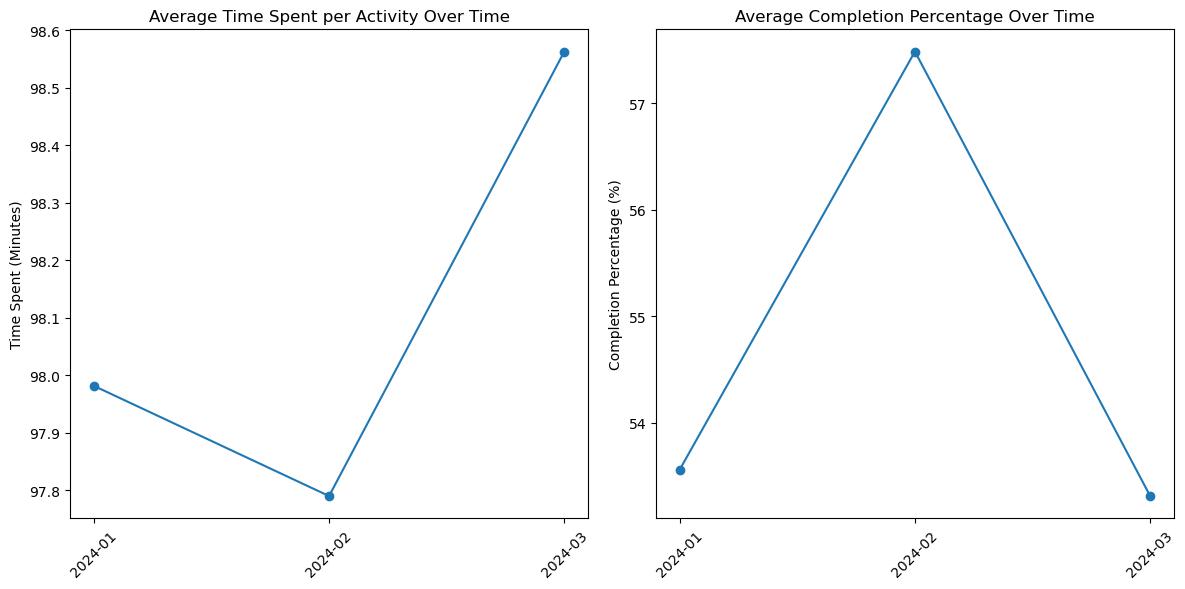

In [17]:
# Create a month-year column for aggregation
course_activity_df['Month'] = course_activity_df['Date'].dt.to_period('M')

# Merge with feedback_df to include ratings
merged_df = course_activity_df.merge(
    feedback_df[['Student_ID', 'Course_ID', 'Rating']],
    on=['Student_ID', 'Course_ID'],
    how='left'  # Keep all activities, with NaN for missing ratings
)

# Merge with students_df for demographic context
merged_df = merged_df.merge(
    students_df[['Student_ID', 'Age', 'Gender', 'Location']],
    on='Student_ID',
    how='left'
)

# Aggregate engagement metrics by month
engagement_trends = merged_df.groupby('Month').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean',
    'Student_ID': 'count'  # Count activities
}).rename(columns={'Student_ID': 'Activity_Count'}).reset_index()

# Plot engagement trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(engagement_trends['Month'].astype(str), engagement_trends['Time_Spent_Minutes'], marker='o')
plt.title('Average Time Spent per Activity Over Time')
plt.ylabel('Time Spent (Minutes)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(engagement_trends['Month'].astype(str), engagement_trends['Completion_Percentage'], marker='o')
plt.title('Average Completion Percentage Over Time')
plt.ylabel('Completion Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Overall Insights
- Course Engagement:
    - WD404 has higher completion percentages, suggesting it’s more engaging or easier to complete.
    - PY202 shows high variability in completion, indicating inconsistent student progress.
    - Time spent doesn’t strongly predict completion, suggesting other factors (e.g., course difficulty, student motivation) play a role.

- Demographics:
    - Age, gender, and location show minimal impact on completion percentage, but Bangalore and Chennai students slightly outperform others.
    - Students are young (mean age ~25), with balanced gender distribution.

## Limitations
Data set is very limited observations. Mostly the timeline is only for three months. This is very limited for drawing out timeline analysis.